Notebook to make images for the final report. 

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
datadir = '/media/stijndc/data/planet_2/data/raw/'

In [4]:
df_train = pd.read_csv(os.path.join(datadir, 'train_labels.csv')) #train_v2.csv
df_test = pd.read_csv(os.path.join(datadir, 'test_labels.csv')) #sample_submission_v2.csv
traindir = os.path.join(datadir, 'train-jpg/') # dir with training jpgs
testdir =  os.path.join(datadir, 'test-jpg/')  # dir with test jpgs, original + additional

### Data and goal of the competition

In [8]:
# number of train and test images
len(os.listdir(testdir))

61191

In [9]:
# no of unique label combinations
len(np.unique([tuple(l) for l in data_labels.values]))

458

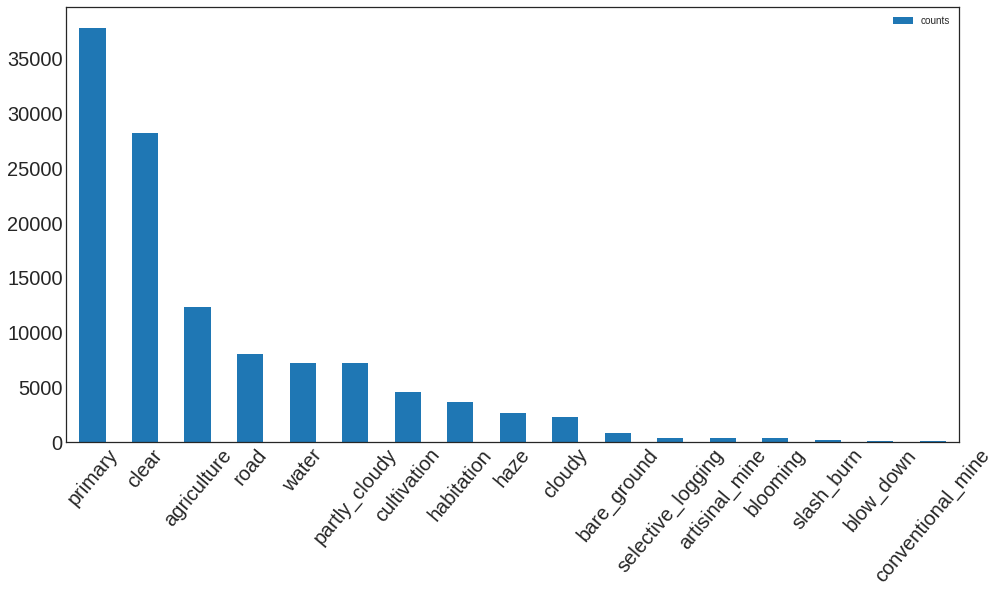

In [7]:
# list of possible labels
flatten = lambda l: [item for sublist in l for item in sublist]
labels = sorted(list(set(flatten([l.split(' ') for l in df_train['tags'].values]))))

# Map labels
label_map = {l: i for i, l in enumerate(labels)}

data_labels = df_train['tags'].apply(lambda x: x.split(' '))

counts = {label:0 for label in labels}
for l in data_labels:
    for tag in l:
        counts[tag] += 1
        
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(16,8))
pd.DataFrame(data = list(counts.values()), index= list(counts.keys()), columns=['counts']).sort_values('counts', ascending=False).plot(kind='bar', rot=50,ax=ax)
ax.tick_params(labelsize=20)

fig.savefig('./figures/labels.pdf')

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
agriculture,12338,38,225,32,22,9150,24,24,3377,2737,672,2492,11990,6036,65,119,2718
artisinal_mine,38,339,40,0,0,307,0,4,18,29,5,27,324,110,6,0,299
bare_ground,225,40,859,3,4,744,0,10,89,163,41,74,683,323,13,10,206
blooming,32,0,3,332,1,311,0,0,35,4,4,17,332,10,7,2,16
blow_down,22,0,4,1,98,85,0,0,8,3,0,13,98,2,1,2,3
clear,9150,307,744,311,85,28203,0,70,3527,3090,0,0,27668,6295,308,173,5277
cloudy,24,0,0,0,0,0,2330,0,0,2,0,0,331,5,0,0,85
conventional_mine,24,4,10,0,0,70,0,100,4,36,2,28,94,59,0,0,26
cultivation,3377,18,89,35,8,3527,0,4,4477,895,202,748,4455,1294,58,126,868
habitation,2737,29,163,4,3,3090,2,36,895,3662,129,441,3471,2787,13,41,915


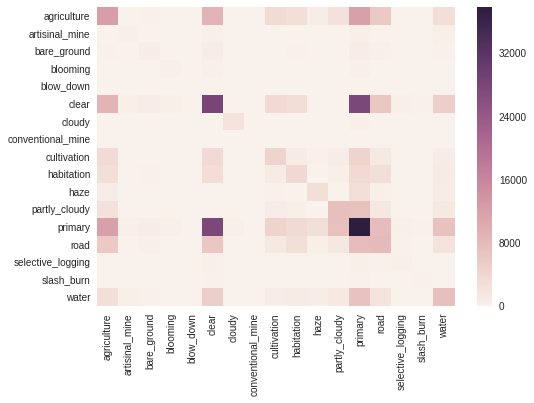

In [10]:
import seaborn as sns

# Add onehot features for every label
labels_df = df_train.copy()

for label in labels:
    labels_df[label] = labels_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)

def make_cooccurence_matrix(labels):
    numeric_df = labels_df[labels]; 
    c_matrix = numeric_df.T.dot(numeric_df)
    sns.heatmap(c_matrix)
    return c_matrix
    
# Compute the co-ocurrence matrix
make_cooccurence_matrix(labels)

In [27]:
# Training data
import numpy as np
from tqdm import tqdm
import cv2

x_train = []
y_train = []

print('Reading in training data...')
for f, tags in tqdm(df_train.values[:10000]):
    fpath = os.path.join(traindir, '{}.jpg'.format(f))
    img = cv2.imread(fpath) # Read in image
    
    targets = np.zeros(17) # Corresponding label vector
    for t in tags.split(' '):
        targets[label_map[t]] = 1 
        
    x_train.append(cv2.resize(img, (32, 32))) # resize
    y_train.append(targets)
    

# Convert to np array
y_train = np.array(y_train, np.uint8)
x_train = np.array(x_train, np.float16) / 255.  # Normalize the pixel intensities

  1%|          | 58/10000 [00:00<00:17, 577.12it/s]

Reading in training data...


100%|██████████| 10000/10000 [00:14<00:00, 671.90it/s]


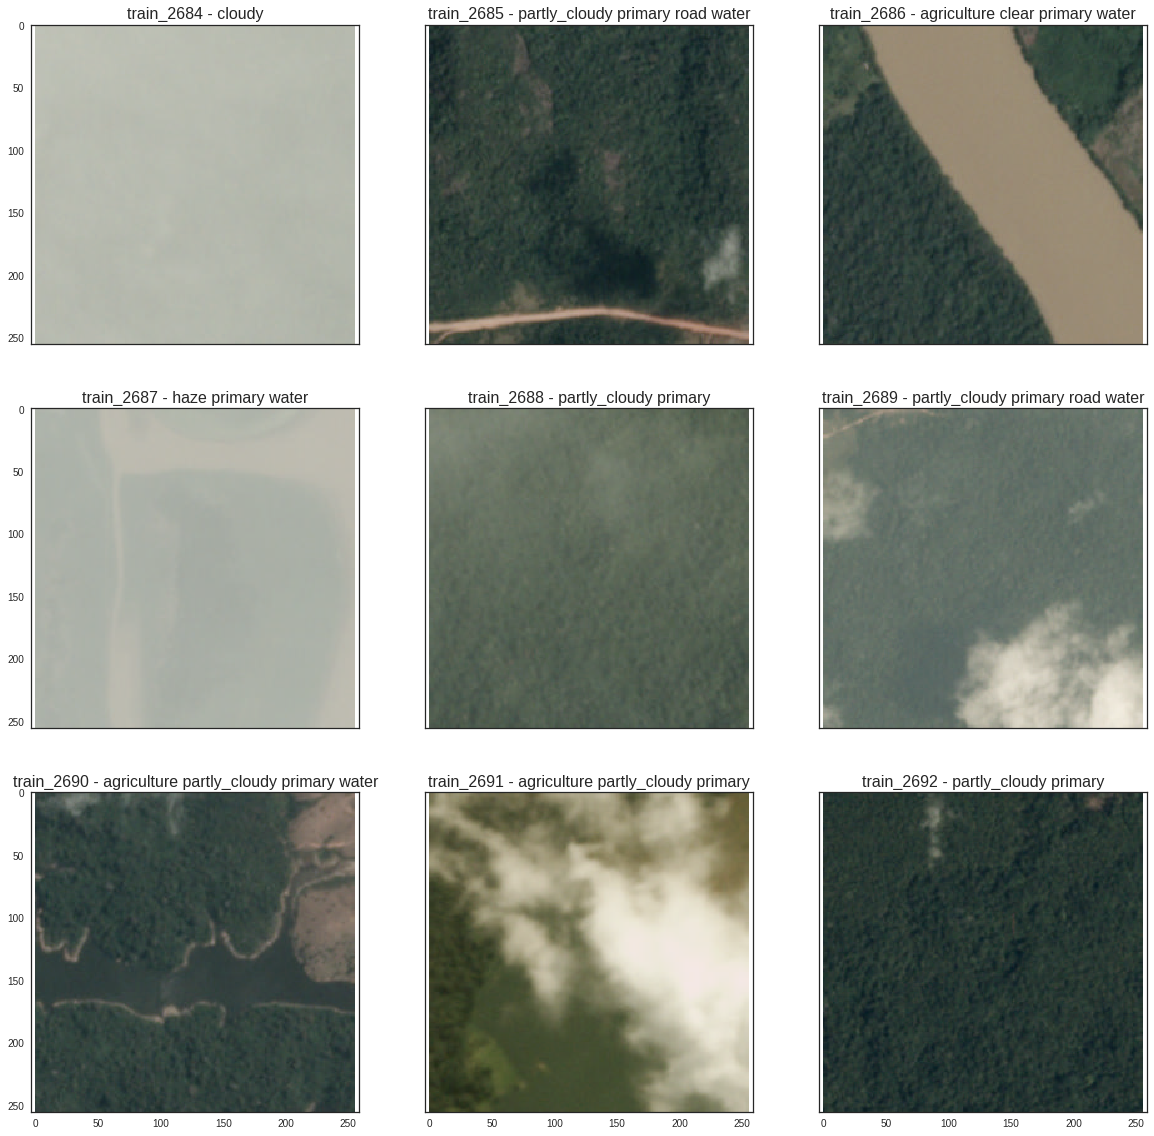

In [35]:
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))
i = 0
random_index=np.random.randint(0,9990)
plt.style.use('seaborn-white')
for f, l in df_train[random_index:random_index+9].values:
    img = cv2.imread(os.path.join(traindir, '{}.jpg'.format(f)))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title('{} - {}'.format(f, l)).set_fontsize(16)
    i += 1

### Methods

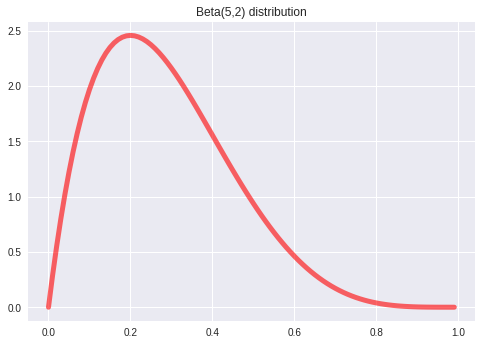

In [11]:
from scipy.stats import beta
fig, ax = plt.subplots()
a = 2
b = 5

x = np.linspace(beta.ppf(0.01, a, b),
               beta.ppf(0.99, a, b), 100)
x = np.arange(0,1,0.01)
ax.plot(x, beta.pdf(x, a, b),
          'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set_title('Beta(5,2) distribution')